## Plotting number of vehicles with turnstile by unidad_de_negocio

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt
import time
import re

from Utils import TransantiagoConstants
from Utils import ReadTurnstilesDataBase

In [3]:
ana_turnstile_df = ReadTurnstilesDataBase.readTurnstileData()[0]

In [4]:
ana_turnstile_df.head()

,UN,sitio_subida,fecha_instalacion
0,U1,WA-9900,2017-05-30
1,U1,ZN-6458,2017-05-30
2,U1,BJFD-16,2017-05-31
3,U1,ZN-5962,2017-05-31
4,U1,WA-8256,2017-05-31


In [5]:
ana_turnstile_df = ReadTurnstilesDataBase.processAnaTurnstiles(ana_turnstile_df)

In [6]:
u1_turnstile_buses = ana_turnstile_df.loc[ana_turnstile_df['UN']=='U1',:]
u2_turnstile_buses = ana_turnstile_df.loc[ana_turnstile_df['UN']=='U2',:]
u3_turnstile_buses = ana_turnstile_df.loc[ana_turnstile_df['UN']=='U3',:]
u4_turnstile_buses = ana_turnstile_df.loc[ana_turnstile_df['UN']=='U4',:]
u5_turnstile_buses = ana_turnstile_df.loc[ana_turnstile_df['UN']=='U5',:]
u6_turnstile_buses = ana_turnstile_df.loc[ana_turnstile_df['UN']=='U6',:]
u7_turnstile_buses = ana_turnstile_df.loc[ana_turnstile_df['UN']=='U7',:]

In [7]:
grouped_u1 = u1_turnstile_buses.groupby(['fecha_instalacion']).size().to_frame().reset_index().rename(columns = {0:'VEHICULOS'})
grouped_u2 = u2_turnstile_buses.groupby(['fecha_instalacion']).size().to_frame().reset_index().rename(columns = {0:'VEHICULOS'})
grouped_u3 = u3_turnstile_buses.groupby(['fecha_instalacion']).size().to_frame().reset_index().rename(columns = {0:'VEHICULOS'})
grouped_u4 = u4_turnstile_buses.groupby(['fecha_instalacion']).size().to_frame().reset_index().rename(columns = {0:'VEHICULOS'})
grouped_u5 = u5_turnstile_buses.groupby(['fecha_instalacion']).size().to_frame().reset_index().rename(columns = {0:'VEHICULOS'})
grouped_u6 = u6_turnstile_buses.groupby(['fecha_instalacion']).size().to_frame().reset_index().rename(columns = {0:'VEHICULOS'})
grouped_u7 = u7_turnstile_buses.groupby(['fecha_instalacion']).size().to_frame().reset_index().rename(columns = {0:'VEHICULOS'})

In [8]:
grouped_u1.loc[:,'CUMSUM'] = grouped_u1.loc[:,'VEHICULOS'].cumsum()
grouped_u2.loc[:,'CUMSUM'] = grouped_u2.loc[:,'VEHICULOS'].cumsum()
grouped_u3.loc[:,'CUMSUM'] = grouped_u3.loc[:,'VEHICULOS'].cumsum()
grouped_u4.loc[:,'CUMSUM'] = grouped_u4.loc[:,'VEHICULOS'].cumsum()
grouped_u5.loc[:,'CUMSUM'] = grouped_u5.loc[:,'VEHICULOS'].cumsum()
grouped_u6.loc[:,'CUMSUM'] = grouped_u6.loc[:,'VEHICULOS'].cumsum()
grouped_u7.loc[:,'CUMSUM'] = grouped_u7.loc[:,'VEHICULOS'].cumsum()

In [9]:
colors = [(3, 169, 244), (13, 71, 161),(51, 105, 30),(244, 81, 30),(0, 150, 136),(211, 47, 47),(251, 192, 45)]
for i in range(len(colors)):
    r, g, b = colors[i]  
    colors[i] = (r / 255., g / 255., b / 255.)

* Be aware of the dates condition in the plots above

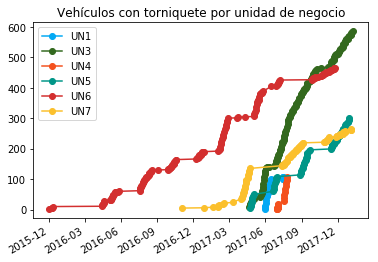

In [10]:
fig_1, ax_1 = plt.subplots()
u1 = ax_1.plot(grouped_u1['fecha_instalacion'],grouped_u1['CUMSUM'],'o-',color = colors[0])
u3 = ax_1.plot(grouped_u3['fecha_instalacion'],grouped_u3['CUMSUM'],'o-',color = colors[2])
u4 = ax_1.plot(grouped_u4['fecha_instalacion'],grouped_u4['CUMSUM'],'o-',color = colors[3])
u5 = ax_1.plot(grouped_u5['fecha_instalacion'],grouped_u5['CUMSUM'],'o-',color = colors[4])
u6 = ax_1.plot(grouped_u6['fecha_instalacion'],grouped_u6['CUMSUM'],'o-',color = colors[5])
u7 = ax_1.plot(grouped_u7['fecha_instalacion'],grouped_u7['CUMSUM'],'o-',color = colors[6])
ax_1.format_xdata = mdates.DateFormatter('%Y-%m')
fig_1.autofmt_xdate()
#ax_1.grid(True)
ax_1.set_title('Vehículos con torniquete por unidad de negocio')
plt.legend((u1[0],u3[0],u4[0],u5[0], u6[0], u7[0]), ('UN1','UN3','UN4','UN5','UN6','UN7'))
plt.savefig('C:/Users/leoca_000/Desktop/Evasion/03_report/02_Figs/1_vehWithTurnsByUn.pdf')

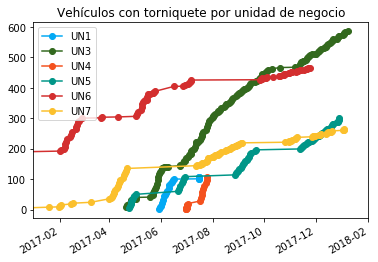

In [12]:
fig_2, ax_2 = plt.subplots()
u1 = ax_2.plot(grouped_u1['fecha_instalacion'],grouped_u1['CUMSUM'],'o-',color = colors[0])
u3 = ax_2.plot(grouped_u3['fecha_instalacion'],grouped_u3['CUMSUM'],'o-',color = colors[2])
u4 = ax_2.plot(grouped_u4['fecha_instalacion'],grouped_u4['CUMSUM'],'o-',color = colors[3])
u5 = ax_2.plot(grouped_u5['fecha_instalacion'],grouped_u5['CUMSUM'],'o-',color = colors[4])
u6 = ax_2.plot(grouped_u6['fecha_instalacion'],grouped_u6['CUMSUM'],'o-',color = colors[5])
u7 = ax_2.plot(grouped_u7['fecha_instalacion'],grouped_u7['CUMSUM'],'o-',color = colors[6])
ax_2.format_xdata = mdates.DateFormatter('%Y-%m')
fig_2.autofmt_xdate()
#ax_2.grid(True)
ax_2.set_title('Vehículos con torniquete por unidad de negocio')
start_limit = pd.to_datetime('2017-01-01')
end_limit = pd.to_datetime('2018-02-01')
ax_2.set_xlim(start_limit,end_limit)
plt.legend((u1[0],u3[0],u4[0],u5[0], u6[0], u7[0]), ('UN1','UN3','UN4','UN5','UN6','UN7'))
plt.savefig('C:/Users/leoca_000/Desktop/Evasion/03_report/02_Figs/1_vehWithTurnsByUn_2017.pdf')

### Closed